# CREATION OF MODULE(TRAINING)

In [1]:
#Checking For TensorFlow
import numpy
import tensorflow as tf
import tensorflow_hub as hub

print('Version of Tensorflow hub is: ',hub.__version__)
print('Version of Tensorflow is:', tf.__version__)
print('GPU','available :)' if tf.config.list_physical_devices('GPU') else 'not available :(')

Version of Tensorflow hub is:  0.12.0
Version of Tensorflow is: 2.10.0
GPU available :)


#### loading the data and preparing the file names to access the photos

In [2]:
#processing data in req_names.txt to get a dataframe having ID and Name
req_dictionary = {}
with open("105_classes_pins_dataset/req_names.txt") as req_file:
    req_list = req_file.readlines()
    current_name = None
    for i in req_list:
        if i != '\n':
            if "pins" in i:
                current_name=i[5:]
                current_name=current_name[:-2]
            else:
                req_dictionary[i[:-5]]=current_name
required_dataset = {'ID':req_dictionary.keys(),'Name':req_dictionary.values()}
import pandas as pd
req_df = pd.DataFrame(required_dataset)
print(req_df)
req_df.to_csv('req_names.csv')

                      ID          Name
0        Adriana Lima0_0  Adriana Lima
1      Adriana Lima101_3  Adriana Lima
2      Adriana Lima102_4  Adriana Lima
3      Adriana Lima103_5  Adriana Lima
4      Adriana Lima104_6  Adriana Lima
...                  ...           ...
17529   tom ellis96_4426     tom ellis
17530   tom ellis97_4427     tom ellis
17531   tom ellis98_4428     tom ellis
17532   tom ellis99_4429     tom ellis
17533    tom ellis9_4416     tom ellis

[17534 rows x 2 columns]


In [3]:
#number of photos of each person in the dataset
req_df.Name.value_counts()

Leonardo DiCaprio     237
Robert Downey Jr      233
Katherine Langford    226
Alexandra Daddario    225
elizabeth olsen       221
                     ... 
Morgan Freeman        105
Brian J. Smith        102
Cristiano Ronaldo      98
Mark Zuckerberg        95
Lionel Messi           86
Name: Name, Length: 105, dtype: int64

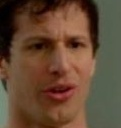

In [4]:
### Lets look at an image from Ipython
from IPython.display import Image
folder = 'pins_'+req_df['Name'][1000]
file = req_df['ID'][1000]+'.jpg'
Image(f'105_classes_pins_dataset/{folder}/{file}')

In [5]:
file_names = []
for i in range(len(req_df)):
    folder = 'pins_'+req_df['Name'][i]
    file = req_df['ID'][i]+'.jpg'
    file_names.append(f'105_classes_pins_dataset/{folder}/{file}')
print(file_names)

['105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima0_0.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima101_3.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima102_4.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima103_5.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima104_6.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima105_7.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima106_8.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima107_9.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima108_10.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima109_11.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima10_2.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima110_13.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima111_14.jpg', '105_classes_pins_dataset/pins_Adriana Lima/Adriana Lima112_15.jpg', '105_classes_pins_dataset/pins_Adriana Lima/A

In [6]:
import numpy as np
labels = np.array(req_df['Name'])
print(labels,len(labels))

['Adriana Lima' 'Adriana Lima' 'Adriana Lima' ... 'tom ellis' 'tom ellis'
 'tom ellis'] 17534


In [7]:
unique_names = np.unique(labels)
print(len(unique_names))

105


In [9]:
# getting all the images using opencv and fixing the color channels
import cv2
images = []
for i in file_names:
    img = cv2.imread(i)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    images.append(img)
print(len(images))

17534


In [13]:
# using frontal face detector to detect faces in the images
import cv2
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
faces = []
for i in images:
    face = face_detector.detectMultiScale(i,1.3,5)
    faces.append(face)

In [14]:
# finding the statistics of number of faces in the images
face_count = []
for i in range(len(faces)):
    face_count.append(len(faces[i]))
# grouping the face count and displaying the number of images for each face count
req_df['face_count'] = face_count
req_df.groupby(['face_count']).size()

face_count
0     5825
1    11708
2        1
dtype: int64

In [15]:
# dropping the faces from the dataset which have other than 1 face
req_df = req_df[req_df['face_count']==1]
req_df = req_df.reset_index(drop=True)

In [19]:
# dropping the images from the images list which have other than 1 face
images = [images[i] for i in range(len(images)) if face_count[i]==1]
# dropping the faces from the faces list which have other than 1 face
faces = [faces[i] for i in range(len(faces)) if face_count[i]==1]

In [20]:
#number of photos of each person in the dataset
req_df.Name.value_counts()

Alexandra Daddario    196
Katherine Langford    179
Adriana Lima          174
kiernen shipka        162
elizabeth olsen       162
                     ... 
Lionel Messi           60
Bobby Morley           53
Bill Gates             31
Taylor Swift           27
Morgan Freeman         23
Name: Name, Length: 105, dtype: int64

In [21]:
print(faces)

[array([[ 62,  99, 459, 459]], dtype=int32), array([[ 34,  46, 213, 213]], dtype=int32), array([[ 17,  19, 103, 103]], dtype=int32), array([[ 21,  35, 150, 150]], dtype=int32), array([[ 8, 13, 81, 81]], dtype=int32), array([[ 17,  24, 135, 135]], dtype=int32), array([[ 21,  35, 278, 278]], dtype=int32), array([[ 27,  31, 192, 192]], dtype=int32), array([[  7,  20, 119, 119]], dtype=int32), array([[ 11,  21, 260, 260]], dtype=int32), array([[ 52,  63, 394, 394]], dtype=int32), array([[18, 20, 85, 85]], dtype=int32), array([[ 34,  24, 147, 147]], dtype=int32), array([[ 52,  58, 328, 328]], dtype=int32), array([[ 31,  40, 182, 182]], dtype=int32), array([[ 21,  21, 126, 126]], dtype=int32), array([[ 96, 108, 332, 332]], dtype=int32), array([[ 39,  38, 182, 182]], dtype=int32), array([[ 35,  38, 186, 186]], dtype=int32), array([[ 12,  99, 327, 327]], dtype=int32), array([[ 36,  44, 233, 233]], dtype=int32), array([[ 40,  54, 223, 223]], dtype=int32), array([[14, 16, 93, 93]], dtype=int32),

In [23]:
# cropping the faces from the images
cropped_images = []
for i in range(len(images)):
    x,y,w,h = faces[i][0]
    cropped_images.append(images[i][y:y+h,x:x+w])

In [24]:
# saving the cropped images to the cropped_images folder
file_names=[]
import os
os.mkdir('cropped_images')
for i in range(len(cropped_images)):
    folder = 'cropped_images/'+req_df['Name'][i]
    file = req_df['ID'][i]+'.jpg'
    if not os.path.exists(folder):
        os.mkdir(folder)
    # appending the file names to the file_names list
    file_names.append(f'{folder}/{file}')
    cv2.imwrite(f'{folder}/{file}',cropped_images[i])

In [25]:
import numpy as np
labels = np.array(req_df['Name'])
print(labels,len(labels))

['Adriana Lima' 'Adriana Lima' 'Adriana Lima' ... 'tom ellis' 'tom ellis'
 'tom ellis'] 11708


In [28]:
boolean_labels = [label == unique_names for label in labels]

In [29]:
# dividing the data into train,test and validation sets
from sklearn.model_selection import train_test_split
train_files,test_files,train_labels,test_labels = train_test_split(file_names,boolean_labels,test_size=0.2,random_state=42)
train_files,val_files,train_labels,val_labels = train_test_split(train_files,train_labels,test_size=0.2,random_state=42)

#### Converting each image into tensors

In [30]:
IMG_SIZE=224

def image_tensors(img_path,img_size=IMG_SIZE):

  #read an image file
  image=tf.io.read_file(img_path)

  #Turning the image file into tensors with 3 colors [Red,Green,Blue]
  image=tf.image.decode_jpeg(image,channels=3)

  #Normalizing our image to size 0-1
  image=tf.image.convert_image_dtype(image,dtype=tf.float32)

  #Resizing our image to 224x224
  image =tf.image.resize(image,size=[img_size,img_size])

  return image

In [31]:
print(image_tensors(file_names[6],IMG_SIZE))

Metal device set to: Apple M1


2022-12-19 11:25:20.690862: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-19 11:25:20.692316: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


tf.Tensor(
[[[0.08279476 0.09063791 0.08671632]
  [0.06321967 0.0710628  0.06714123]
  [0.10192101 0.10976414 0.10584258]
  ...
  [0.23258966 0.22082496 0.2012171 ]
  [0.30475986 0.29049164 0.27589083]
  [0.17422831 0.15854204 0.14677733]]

 [[0.08475461 0.09259775 0.08867618]
  [0.06135979 0.06920292 0.06528135]
  [0.1174577  0.12530084 0.12137926]
  ...
  [0.16457893 0.15281422 0.13320637]
  [0.17685455 0.16258632 0.1479855 ]
  [0.13821128 0.12252501 0.11076031]]

 [[0.10036445 0.10820758 0.10428602]
  [0.06722073 0.07506386 0.07114229]
  [0.1201472  0.12799034 0.12406877]
  ...
  [0.16088684 0.14912213 0.12951429]
  [0.14095974 0.12669152 0.11209071]
  [0.15053236 0.13484609 0.12308138]]

 ...

 [[0.13483748 0.14268062 0.13091591]
  [0.10126595 0.11194521 0.10301665]
  [0.10994091 0.12750536 0.12264471]
  ...
  [0.681094   0.784613   0.8512797 ]
  [0.6886379  0.7931517  0.85381657]
  [0.6900542  0.79513144 0.8523968 ]]

 [[0.13255095 0.14039409 0.12362235]
  [0.13414212 0.14572668 0

In [32]:
def get_image_label(img_path,label):
  img=image_tensors(img_path)
  return img,label

In [33]:
BATCH_SIZE=32

def create_data_batch(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):

  if test_data:
    print('Creating data batches for test data')
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X))) #just making a dataset out of data
    data=data.map(image_tensors).batch(batch_size)
    return data

  elif valid_data:
    print('Creating data batches for valid data')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data=data.map(get_image_label).batch(batch_size)
    return data
  else:
    print('Creating data batches for train data')
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data=data.shuffle(len(X))
    data=data.map(get_image_label).batch(batch_size)
    return data


In [34]:
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]

OUTPUT_SHAPE=len(unique_names)

MODEL_URL="imagenet_mobilenet_v2_130_224_classification_5/"

#### Creating the model using [Imagenet Mobilenet V2](https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5)

In [35]:
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print('Building model with:',model_url)

  ## Setup the model layers
  model=tf.keras.Sequential([
      hub.KerasLayer(model_url), ## Layer1 (MODEL_URL)
      tf.keras.layers.Dense(units=output_shape,   ## Layer2 (Just making output to come in our required shpae)
                             activation="softmax")
      ])

  ## Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

  ## Building the model
  model.build(input_shape)

  return model

In [36]:
model=create_model()
model.summary()

Building model with: imagenet_mobilenet_v2_130_224_classification_5/
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 105)               105210    
                                                                 
Total params: 5,537,923
Trainable params: 105,210
Non-trainable params: 5,432,713
_________________________________________________________________


In [37]:
## Load tensor board notebook extension
%load_ext tensorboard

In [38]:
import datetime
import os

## Create a function for callbacks
def create_tensor_callbacks():
  log_dir=os.path.join('/Users/parzival979/PycharmProjects/FACE_RECOGNITION/static/data/logs',datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

  return tf.keras.callbacks.TensorBoard(log_dir)

In [39]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)

In [40]:
## Creating data batch of full size
train_data_full=create_data_batch(train_files,train_labels)
val_data_full=create_data_batch(val_files,val_labels,valid_data=True)

full_model=create_model()

full_model_tensorboard=create_tensor_callbacks()

full_model_earlystopping=tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=3)

Creating data batches for train data
Creating data batches for valid data
Building model with: imagenet_mobilenet_v2_130_224_classification_5/


#### Training the model

In [41]:
full_model.fit(train_data_full,
               epochs=100,
               steps_per_epoch=len(train_data_full),
               validation_data=val_data_full,
               validation_steps=int(0.25*len(val_data_full)),
               callbacks=[full_model_tensorboard,full_model_earlystopping])

Epoch 1/100


2022-12-19 11:27:44.482635: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-19 11:27:45.964917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - ETA: 0s - loss: 3.9926 - accuracy: 0.1172

2022-12-19 11:28:30.656829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 49s 190ms/step - loss: 3.9926 - accuracy: 0.1172 - val_loss: 3.1872 - val_accuracy: 0.2277
Epoch 2/100
235/235 [==============================] - 45s 193ms/step - loss: 2.7640 - accuracy: 0.3093 - val_loss: 2.7856 - val_accuracy: 0.2946
Epoch 3/100
235/235 [==============================] - 44s 185ms/step - loss: 2.2906 - accuracy: 0.4167 - val_loss: 2.6521 - val_accuracy: 0.3438
Epoch 4/100
235/235 [==============================] - 43s 183ms/step - loss: 2.0064 - accuracy: 0.4773 - val_loss: 2.5450 - val_accuracy: 0.3661
Epoch 5/100
235/235 [==============================] - 46s 198ms/step - loss: 1.7840 - accuracy: 0.5339 - val_loss: 2.4190 - val_accuracy: 0.3772
Epoch 6/100
235/235 [==============================] - 45s 190ms/step - loss: 1.6052 - accuracy: 0.5785 - val_loss: 2.4533 - val_accuracy: 0.3839
Epoch 7/100
235/235 [==============================] - 47s 201ms/step - loss: 1.4593 - accuracy: 0.6169 - val_loss: 2.3720 - val_accurac

#### Saving the model

In [42]:
def save_model(model,suffix=None):
  """
  This function saves the given model into a specific location
  """
  model_dir=os.path.join('/Users/parzival979/PycharmProjects/FACE_RECOGNITION/static/data',datetime.datetime.now().strftime('%Y%m%d-%H%M%'))
  model_path=model_dir+'-'+suffix+'.h5'

  print(f"Saving model to: {model_path}")
  model.save(model_path)
  return model_path

In [43]:
save_model(full_model,suffix='full_model')

Saving model to: /Users/parzival979/PycharmProjects/FACE_RECOGNITION/static/data/20221219-1219%-full_model.h5


'/Users/parzival979/PycharmProjects/FACE_RECOGNITION/static/data/20221219-1219%-full_model.h5'

In [44]:
def load_model(model_path):
  """
  This function is used to load a model from a given location
  """
  print(f"Loading model from {model_path}")

  model=tf.keras.models.load_model(model_path,custom_objects={"KerasLayer":hub.KerasLayer})
  return model